In [105]:
import pandas as pd

file = '/home/nkureev/Cells_for_AFM.tsv'
data = pd.read_csv(file, sep='\t')

In [106]:
len(data)

44

In [107]:
data = data.dropna()

In [108]:
len(data)

38

In [109]:
green_data = data[data['Color'] == 'Green']

In [110]:
green_data.head()

,Cell number,Young's modulus,Color
0,1,"702,573.00",Green
1,2,"350,811.00",Green
2,3,"525,243.00",Green
3,4,"363,032.00",Green
4,5,"663,520.00",Green


In [111]:
red_data = data[data['Color'] == 'Red']

In [112]:
red_data.head()

,Cell number,Young's modulus,Color
8,9,"949,627.00",Red
9,10,"845,313.00",Red
11,12,"1,004.42",Red
12,13,"848,391.00",Red
13,14,"678,487.00",Red


In [120]:
red_data_values = []
for i in list(red_data["Young's modulus"]):
    value = int(''.join(i.split('.')[0].split(',')))
    if value > 0:
        red_data_values.append(value)
    
green_data_values = []
for i in list(green_data["Young's modulus"]):
    value = int(''.join(i.split('.')[0].split(',')))
    if value > 0:
        green_data_values.append(value)

In [121]:
len(red_data_values)

18

In [115]:
mean_red = sum(red_data_values) / len(red_data_values)
mean_red

638566.5882352941

In [94]:
sum(list([(x - mean_red)**2 for x in red_data_values])) / (len(red_data_values) - 1)

31516282596.257355

In [100]:
import numpy as np

np.var(red_data_values)

29662383620.006924

In [122]:
red_data_values

[949627,
 845313,
 1004,
 848391,
 678487,
 601345,
 671634,
 503397,
 911614,
 359476,
 473973,
 492927,
 645616,
 714993,
 384980,
 581461,
 697668,
 494730]

In [123]:
len(green_data_values)

18

In [88]:
mean_green = sum(green_data_values) / len(green_data_values)
mean_green

527088.8823529412

In [95]:
sum(list([(x - mean_green)**2 for x in green_data_values])) / (len(green_data_values) - 1)

18302562113.73529

In [101]:
import numpy as np

np.var(green_data_values)

17225940812.927338

In [124]:
green_data_values

[702573,
 350811,
 525243,
 363032,
 663520,
 561261,
 1688,
 576960,
 306768,
 576581,
 416516,
 686270,
 419087,
 602829,
 461374,
 760732,
 579099,
 407855]

In [125]:
from scipy import stats

stats.ttest_ind(red_data_values, green_data_values, equal_var=False)

Ttest_indResult(statistic=1.533305297553713, pvalue=0.13494962436231178)

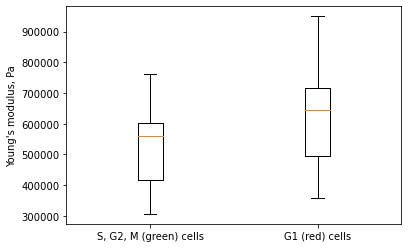

In [104]:
import matplotlib.pyplot as plt

plt.boxplot([green_data_values, red_data_values], labels=['S, G2, M (green) cells', 'G1 (red) cells'])
plt.ylabel("Young's modulus, Pa")
plt.show()